In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib import style;  style.use('ggplot')
from sklearn.datasets.samples_generator import make_blobs

In [2]:
X, y = make_blobs(n_samples=20, centers=3, n_features=2)

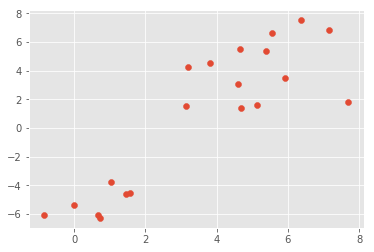

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
colors = 10*['g', 'r', 'c', 'b', 'k']

In [34]:
class BSAS:
    def __init__(self, theta=None, q=None):
        # theta: Dissimarity Threshold
        # q: Max #Clusters
        self.theta = theta
        self.q = q
        self.clusters = {}
        self.centroids = {}
        
    def __findClosestCluster(self, clusters, centroids, sample):
        euclid_dist = {}
        centroid = np.divide((centroids[0], clusters[0].shape[1]), axis=0)
        d = euclid_dist[0] = np.linalg.norm(centroid-sample)
        k = 0
        try:
            for key in centroids[2::]:
                centroid = np.divide(centroids[key], clusters[0].shape[1])
                euclid_dist[key] = np.linalg.norm(centroid-sample)
                if (euclid_dist[key] < d):
                    d = euclid_dist[key]
                    k = key
        except:
            pass
        return d, k
    
    def fit(self, data, order):
        clusters = {}; m = 1
        clusters[m-1] = data[:,order[m-1]]
        
        centroids = {}
        centroids[0] = np.zeros_like(clusters[m-1])
        centroids[0] = np.add(centroids[0], data[:,order[m-1]])
        
        N, l = data.shape
        
        for i in range(2,l):
            dist, k = self.__findClosestCluster(clusters, centroids, data[:,order[i]])
            print (dist)
            if (dist > theta and m < q):
                m += 1
                clusters[m-1] = data[:,order[i]]
                print('1.  ', clusters)
                centroids[m-1] = np.zeros_like(data[:,order[i]])
                centroids[m-1] = np.add(centroids[:,m-1], data[:,order[i]])
            else:
                clusters[k] = np.vstack((clusters[k], data[:,order[i]]))
                centroids[k] = np.add(centroids[k], data[:,order[i]])
                print('2.  ', clusters)
                
        self.clusters = clusters
        self.centroids = centroids
        
    def predict(self):
        return self.clusters, self.centroids

In [35]:
clf = BSAS(theta=1,q=5)
order = np.random.permutation(range(X.shape[0]))
clf.fit(X.T, order)

IndexError: tuple index out of range

In [27]:
clusters, centroids = clf.predict()

In [28]:
clusters

{0: array([ 0.65595186, -6.05795734])}

In [29]:
centroids

{0: array([ 0.65595186, -6.05795734])}